149 
 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 32

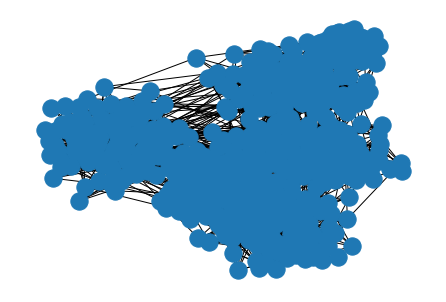

In [ ]:
import random as r
import networkx as nx

def make_graph():
  '''-makes a graph such that:
    1. 4 clusters of 100 nodes each
    2. 500 unique edges in each cluster
    3. 300 unique edges across clusters
    '''
  g=nx.Graph()

  for i in range(400):
    g.add_node(i)

  for i in range(0,400,100):
    for j in range(500):
      r1,r2=r.randint(i,i+100-1),r.randint(i,i+100-1)
      while (r1,r2) in g.edges() or (r2,r1) in g.edges() or r1==r2:
        r1,r2=r.randint(i,i+100-1),r.randint(i,i+100-1)
      g.add_edge(r1,r2)

  for i in range(300):
    l=[1,2,3,4]
    r3=r.choice(l)
    del l[l.index(r3)]
    r4=r.choice(l)
    r5,r6=r.randint((r3-1)*100,(r3*100)-1),r.randint((r4-1)*100,(r4*100)-1)
    while (r5,r6) in g.edges():
      r5,r6=r.randint((r3-1)*100,(r3*100)-1),r.randint((r4-1)*100,(r4*100)-1)
    g.add_edge(r5,r6)

  return g


def disconnect(g):
  '''  
  -remove edges with highest betweeness one by one until graph becomes disconnected
  -returns number of edges removed to disconnect the graph and the final disconnected components
  '''
  d=dict(nx.edge_betweenness(g, normalized=True))
  marklist = sorted(d.items(), key=lambda x:x[1])
  sortdict = dict(marklist)

  c=0
  while nx.is_connected(g)==True:
    keys=list(sortdict.keys())
    max_edge=keys[-1]
    del sortdict[max_edge]
    g.remove_edge(max_edge[0],max_edge[1])
    d=dict(nx.edge_betweenness(g, normalized=True))
    marklist = sorted(d.items(), key=lambda x:x[1])
    sortdict = dict(marklist)
    c+=1
  return(c,list(nx.connected_components(g)))


'''
sum=0
for i in range(10**2):
  sum+=disconnect(make_graph())[0]
print(sum/100)       #average number of edges removed for 100 graphs
#output : 337.89  
'''
g=make_graph()
nx.draw(g)
c,l=disconnect(g)
print(c,'\n',l)
nx.draw(g)